# 疎主成分分析（sparce PCA）の実装

## 参考にしたサイト
### ・データセットについて
### https://aiacademy.jp/texts/show/?id=88

### ・sparce PCAについて
### https://www.haya-programming.com/entry/2018/11/17/223003

## データ読み込み（scikit-learnの手書き文字）

In [74]:
# ライブラリ読み込み
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [75]:
# データ読み込み
digits = load_digits()
print(dir(digits))
# 説明変数（8×8のピクセルデータ）
X = digits.data
# 目的変数（0～9までの正解ラベル）
Y = digits.target
print(X)
print(Y)

['DESCR', 'data', 'images', 'target', 'target_names']
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


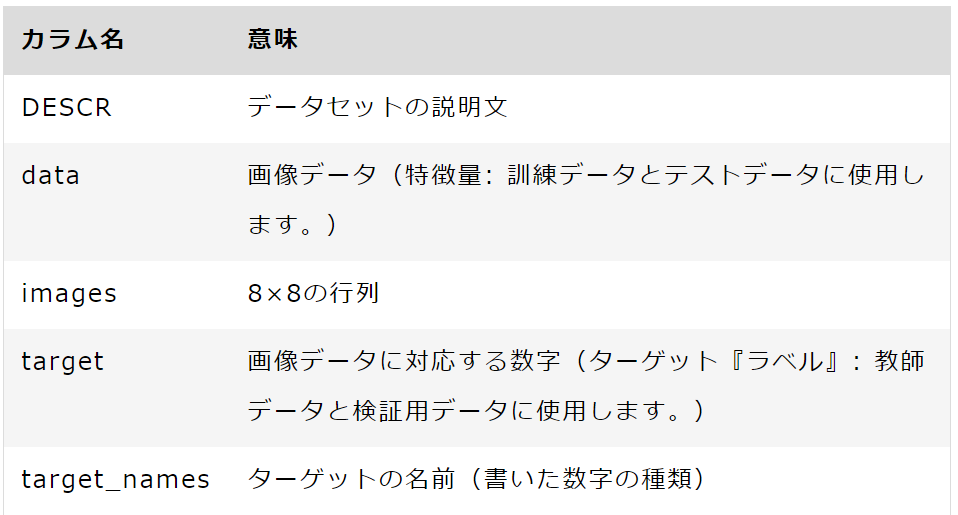

## データを可視化してみる

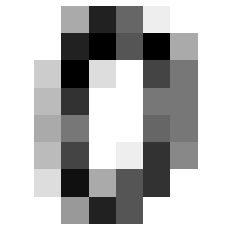

In [76]:
import numpy as np
# numpyのreshape()を使って8×8に戻す
img = np.reshape(digits.data[0], (8,8))

# cmapにより色を指定可能です。
# cmap=plt.cm.gray_rにより白黒で表現し、interpolationをnearestにすることで、最近傍補間という補完を行なっています。
# 最近傍補間とは、画像を拡大・縮小・回転した際に利用する補間法の1つです。
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
# plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

# 上記のcmap=の部分及び、interpolation=を消した下記でも動作します。比べてみてください。
# plt.imshow(img)

plt.axis('off')
plt.show()

## sparce PCAの実装

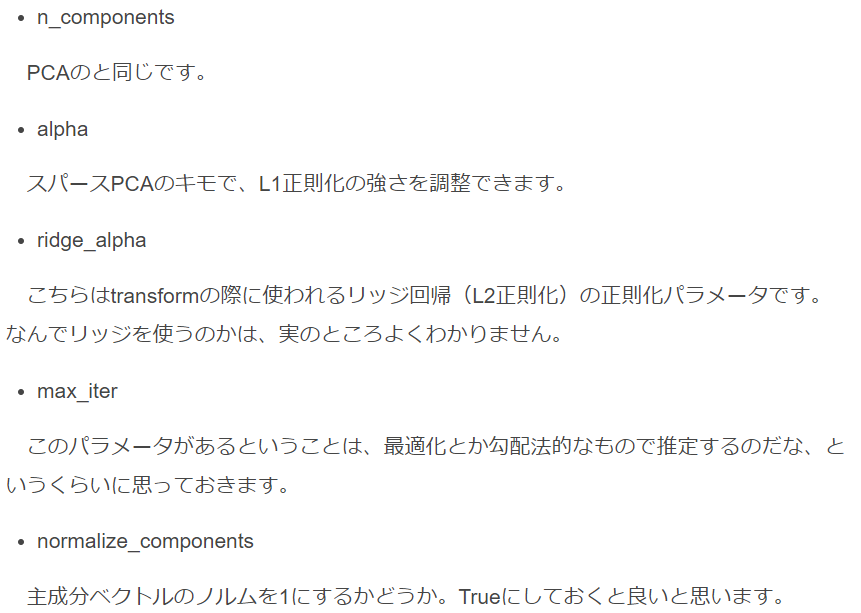

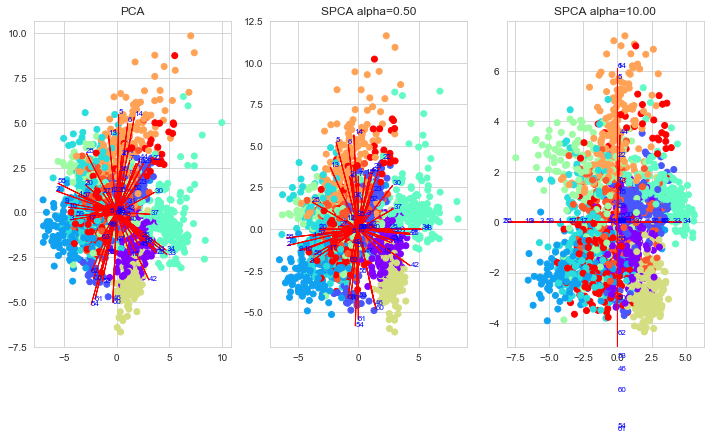

In [77]:
# ライブラリ読み込み
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA

def biplot(X_2d, components, target, ax):
    r1 = 20
    r2 = 1.01
    for i, coef in enumerate(components.T):
        ax.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        ax.text(coef[0]*r1*r2, coef[1]*r1*r2, i, color='b', fontsize=8)

    ax.scatter(X_2d[:,0], X_2d[:,1], c=target, cmap="rainbow")

def main():
    ss = StandardScaler()
    X = ss.fit_transform(digits.data)

    pca = PCA(n_components=2)
    spca = SparsePCA(n_components=2,
                     max_iter=3000,
                     n_jobs=-1,
                     normalize_components=True)
    
    fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)

    X_2d = pca.fit_transform(X)
    biplot(X_2d, pca.components_, digits.target, axes[0])
    axes[0].set_title("PCA")

    for i,alpha in zip([1, 2], [0.5, 10]):
        spca.set_params(alpha=alpha)
        X_2d = spca.fit_transform(X)
        biplot(X_2d, spca.components_, digits.target, axes[i])
        axes[i].set_title("SPCA alpha={:.2f}".format(alpha))
    plt.savefig("result.png")

    # 図と突き合わせて確認するために特徴量の名前を出力しておく
    #for i, name in enumerate(wine.feature_names):
    #    print(i, name)

if __name__ == "__main__":
    main()

In [78]:
# 0のみを使用
# データ読み込み
digits = load_digits()
print(dir(digits))
# 説明変数（8×8のピクセルデータ）
X = digits.data[digits.data==0]
# 目的変数（0～9までの正解ラベル）
Y = digits.target[digits.target==0]
print(X)
print(Y)

['DESCR', 'data', 'images', 'target', 'target_names']
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


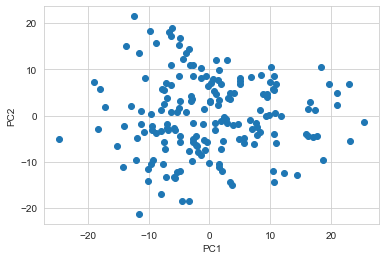

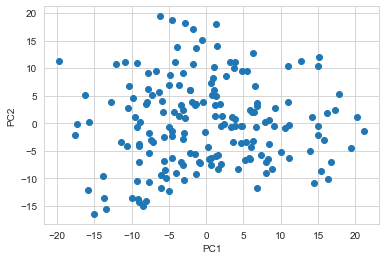

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import sklearn.decomposition # PCAで使うはこれだけ
import sklearn.datasets
data = sklearn.datasets.load_digits(n_class=1)

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(data.data)

spca = SparsePCA(n_components=2,
                     max_iter=3000,
                     n_jobs=-1,
                     normalize_components=True)
spca.set_params(alpha=10)
spca.fit_transform(data.data)


pca_point = pca.fit_transform(data.data)
plt.scatter(*pca_point.T)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

spca_point = spca.fit_transform(data.data)
plt.scatter(*spca_point.T)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 成績のデータを使用してみる
## 参考にしたサイト
### https://statistics.co.jp/reference/software_R/statR_9_principal.pdf#page=25

In [80]:
# データの読み込み
import pandas as pd

seiseki = pd.read_csv('seiseki.csv')

label = pd.read_csv('seiseki.csv',header=None)
label = label.loc[0]
#seiseki = seiseki.loc[:,['kokugo', 'sugaku', 'rika', 'shakai', 'eigo']]
#label =['kokugo', 'sugaku', 'rika', 'shakai', 'eigo']
seiseki

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90
162,0,8,2,9,5,18,42,2,1
163,45,26,29,24,31,57,68,40,27
164,73,31,43,32,59,64,82,48,56


In [81]:
# 準備
ss = StandardScaler()
X = ss.fit_transform(seiseki)
pca = PCA()
spca = SparsePCA(max_iter=3000,
                 n_jobs=-1,
                 normalize_components=True)

In [82]:
# PCA実行
feature = pca.fit_transform(X)
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=seiseki.columns, index=["PC{}".format(x + 1) for x in range(len(seiseki.columns))])

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
PC1,-0.362639,-0.368570,-0.356895,-0.367226,-0.354309,-0.312678,-0.139248,-0.316726,-0.356949
PC2,-0.149422,0.147029,0.181437,0.250686,-0.009508,-0.312168,-0.859298,0.148958,0.046610
PC3,0.073623,-0.061551,-0.399680,0.008251,-0.199606,0.263783,-0.080264,0.783869,-0.317273
PC4,-0.236443,-0.106524,0.029476,0.066644,0.356880,0.712269,-0.284248,-0.293357,-0.354812
PC5,-0.301468,-0.086651,-0.061124,0.262381,0.642392,-0.440125,0.268566,0.189814,-0.338372
PC6,-0.494063,-0.572745,0.408150,0.038858,-0.131948,0.136309,0.106634,0.286649,0.360888
PC7,0.619991,-0.516987,0.408898,-0.176506,0.119437,-0.124784,-0.127556,0.041500,-0.319615
PC8,-0.109703,0.234943,0.446183,0.392465,-0.495133,-0.001600,0.234850,-0.061830,-0.524902
PC9,0.231160,-0.411562,-0.377484,0.736380,-0.132927,0.003495,-0.007348,-0.230749,0.146459


In [83]:
# SPCA実行
spca.set_params(alpha=0.001)
feature2 = spca.fit_transform(X)
# SPCA の固有ベクトル
pd.DataFrame(spca.components_, columns=seiseki.columns, index=["PC{}".format(x + 1) for x in range(len(seiseki.columns))])

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
PC1,-0.357325,-0.370167,-0.387519,-0.368449,-0.348069,-0.282916,-0.078063,-0.302733,-0.387861
PC2,0.003109,-0.018206,-0.013868,-0.115894,0.000000,0.189353,0.974765,-0.003850,0.000000
PC3,0.000000,0.000000,0.257192,0.000000,0.000000,-0.014257,0.000000,-0.950507,0.173742
PC4,0.000000,0.000000,0.000000,0.000000,-0.231002,-0.931077,0.048627,0.091579,0.262645
PC5,-0.119471,0.000000,0.000000,0.006829,0.858668,-0.387950,0.061367,0.000000,-0.306755
PC6,0.589270,0.647715,-0.443420,0.000000,0.000000,0.000000,0.000000,-0.056451,-0.182806
PC7,0.799870,-0.586847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125770
PC8,0.000000,-0.107317,-0.546526,-0.364228,0.420296,0.000000,0.000000,0.000000,0.616832
PC9,0.000000,-0.127574,-0.369391,0.920476,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
# SPCA実行
spca.set_params(alpha=0.003)
feature2 = spca.fit_transform(X)
# SPCA の固有ベクトル
pd.DataFrame(spca.components_, columns=seiseki.columns, index=["PC{}".format(x + 1) for x in range(len(seiseki.columns))])

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
PC1,-0.329807,-0.378092,-0.535735,-0.304507,-0.289375,-0.179907,0.0,-0.216847,-0.453221
PC2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
PC3,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000,0.0,-0.999979,0.000000
PC4,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000
PC5,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
PC6,0.479604,0.823769,-0.302300,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
PC7,0.948196,-0.317686,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
PC8,0.000000,0.000000,-0.444838,0.000000,0.000000,0.000000,0.0,0.000000,0.895611
PC9,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000


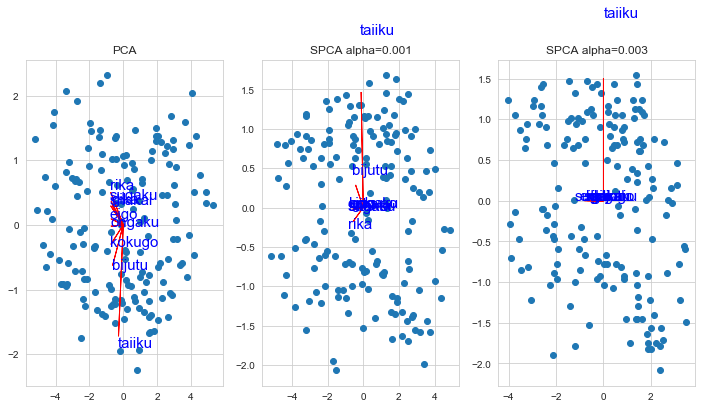

In [87]:
# 図示してみる
def biplot_pca(X_2d, components, ax, label):
    r1 = 2
    r2 = 1.1
    for i, coef in enumerate(components.T):
        ax.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        ax.text(coef[0]*r1*r2, coef[1]*r1*r2, label[i], color='b', fontsize=15)

    ax.scatter(X_2d[:,0], X_2d[:,1])

def biplot_spca(X_2d, components, ax, label):
    r1 = 1.5
    r2 = 1.5
    for i, coef in enumerate(components.T):
        ax.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        ax.text(coef[0]*r1*r2, coef[1]*r1*r2, label[i], color='b', fontsize=15)

    ax.scatter(X_2d[:,0], X_2d[:,1])
    
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)

X_2d = pca.fit_transform(X)
biplot_pca(X_2d, pca.components_, axes[0], label)
axes[0].set_title("PCA")

for i,alpha in zip([1, 2], [0.001, 0.003]):
    spca.set_params(alpha=alpha)
    X_2d = spca.fit_transform(X)
    biplot_spca(X_2d, spca.components_, axes[i], label)
    axes[i].set_title("SPCA alpha={:.3f}".format(alpha))
plt.savefig("result.png")